# Taller 4
Alumno: 
- José Nicolas Castillo Rojas
- Agustin Brito
- Pablo Silva

In [108]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.matlib import repmat

## Parte 1

### Parte 1.1 
Utilice  una  imagen  descargada  de  internet.  De  dicha  imagen  sólo  utilice  una  sección  de 
256x256  píxeles.  Genere  distintas  versiones  de  la  imagen  original  empleando  distintos 
modelos  de  ruido.  Los  ruidos  que  debe  emplear  corresponden  a:  (1)  ruido  gaussiano,  (2) 
uniforme, (3) impulsional-sal e (4) impulsional-pimienta. Usted debe definir el nivel de ruido 
para cada imagen. Se deja a elección definir el nivel de ruido en cada modelo. En total usted 
debe generar cuatro imágenes con los ruidos indicados previamente.

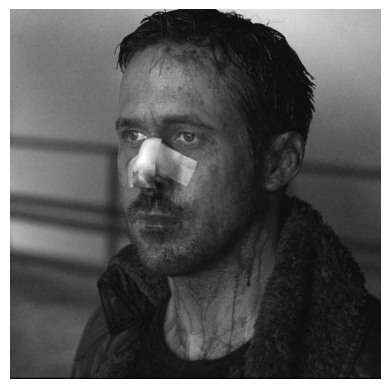

(733, 735)


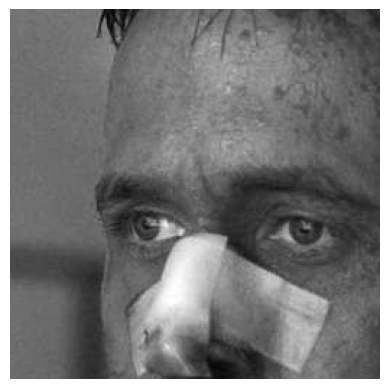

(256, 256)


In [109]:
img =cv2.imread('Ryan Gosling.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray"),plt.axis('off')
plt.show()
print(gray.shape)
# Se Ajusta el tamaño de la imagen a 256x256
alto, width = 256, 256 # tamaño Requerido
x, y =150,100 # desplazamientos de los ejes x e y

gray= gray[y:y +alto, x:x + width]

plt.imshow(gray,cmap="gray"),plt.axis('off')
plt.show()
print(gray.shape)

#### 1)  ruido  gaussiano 

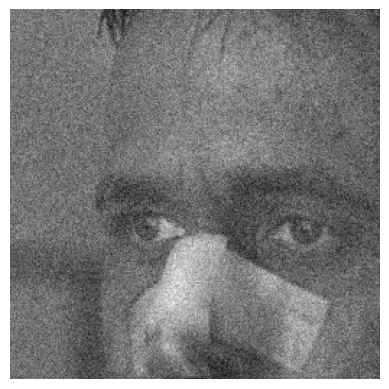

(<matplotlib.image.AxesImage at 0x2012b10f6e0>,
 (-0.5, 255.5, 255.5, -0.5),
 None)

In [110]:
copia= np.copy(gray)/255
# Obtener las dimensiones de la imagen
fil, col = copia.shape

# Generar ruido gaussiano con media 0 y una desviación estándar pequeña
ruido_gauss = np.random.normal(loc=0, size=(fil, col)) * 0.05

img_ruido_gaussiano = cv2.add(copia, ruido_gauss )

plt.imshow(img_ruido_gaussiano, cmap='gray'),plt.axis('off'),plt.show()


#### 2) uniforme

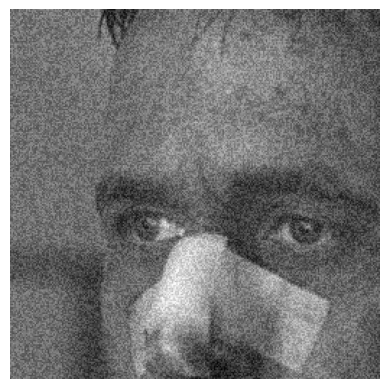

(<matplotlib.image.AxesImage at 0x2012b24e4b0>,
 (-0.5, 255.5, 255.5, -0.5),
 None)

In [111]:
copia= np.copy(gray)
a=0
b=40
ruido = np.random.uniform(a, b, copia.shape).astype('uint8')
img_ruido_uniforme =noisy_image = cv2.add(copia,ruido)
plt.imshow(img_ruido_uniforme, cmap='gray'),plt.axis('off'),plt.show()

#### 3) impulsional-sal 

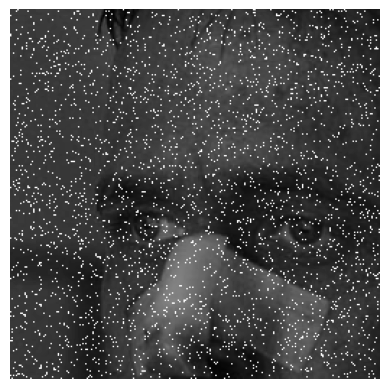

(<matplotlib.image.AxesImage at 0x2012b424980>,
 (-0.5, 255.5, 255.5, -0.5),
 None)

In [112]:
img_ruido_sal= np.copy(gray)
fil, col = img_ruido_sal.shape
ruido = np.random.random((fil,col)) <0.05
img_ruido_sal[ruido] = 255
plt.imshow(img_ruido_sal, cmap='gray'),plt.axis('off'),plt.show()

#### 4) impulsional-pimienta.


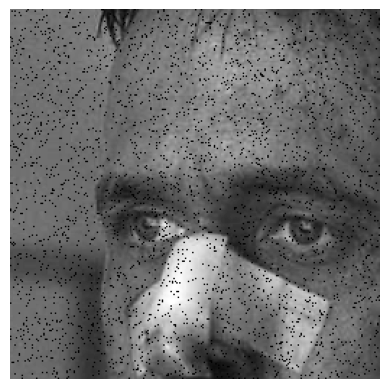

(<matplotlib.image.AxesImage at 0x2012a646960>,
 (-0.5, 255.5, 255.5, -0.5),
 None)

In [113]:
img_ruido_pepper= np.copy(gray)
fil, col = img_ruido_sal.shape
ruido = np.random.random((fil,col)) <0.05
img_ruido_pepper[ruido] = 0
plt.imshow(img_ruido_pepper, cmap='gray'),plt.axis('off'),plt.show()

### Parte 1.2
Para cada imagen ruidosa determine el filtro que mejor reduzca ruido. Utilice sólo un filtro 
por cada imagen. No obstante, el filtro que usted seleccione debe pertenecer a una de las 
tres familias de filtros en el espacio. Esto significa que al menos debe haber un filtro de orden 
estadístico,  un  filtro  adaptivo,  y  un  filtro  lineal  implementado  en  su  tarea.  Explique  las 
razones por las cuales el filtro que usted seleccionó es mejor que otros filtros.

In [114]:
import scipy.ndimage as ndi
import statistics as sts

#### Filtros de orden estadísticos

In [115]:
def filtro_promedio_acotado(subimage, acut):
    S= np.sort(subimage.flatten())
    B= S[acut:-acut]
    val=np.sum(B)/len(B)
    return val
def filtro_pto_medio(subimagen):
    return 1/2*(np.max(subimagen)+min(subimagen))


def filtro_promedio(subimagen):
    return np.mean(subimagen)

def filtro_mediana(subimagen):
    return np.median(subimagen)

def filtro_moda(subimagen):
    return np.mode(subimagen)

def filtro_max(subimagen):
    return np.max(subimagen)

def filtro_min(subimagen):
    return np.min(subimagen)

def filtro_gaussiano(A):
    A= np.reshape(A, (10,10))
    t= 10
    sigma = 2.2
    ventana= np.linspace(-t/2, t/2, t)
    u,v = np.meshgrid(ventana, ventana)
    G= (1/(sigma**2*2*np.pi))*np.exp(-(u**2+v**2)/(2*sigma**2))
    N= G/np.sum(G.flatten())  #normalizamos
    T = N*A
    return np.sum(T)


In [116]:
def filtro_mediana_adaptiva(A):
    m,n = A.shape
    Smax = 16
    ws   = 4
    J = np.zeros([m,n])

    for i in range(0,m-Smax):
        for j in range(0,n-Smax):
            sw     = 1
            Zxy    = A[i,j]
            wadapt = ws
            while(sw):   
                B = A[i:i+wadapt, j:j+wadapt]
                      
                pixel, newwin = bloque(B,Zxy,wadapt,Smax)
                if ( pixel != -1):
                    J[i,j]=pixel
                    sw = 0
                else:
                    wadapt=newwin
            
    return (np.uint8(J[0:m-Smax, 0:n-Smax]))
                
def bloque(A,Zxy, wadapt, Smax):

    newwin= wadapt

    Zmin= np.min(A.flatten())
    Zmax= np.max(A.flatten())
    Zmed= np.median(A.flatten())
    px = -1

    A1= Zmed - Zmin
    A2= Zmed - Zmax

    if (newwin<=Smax):
    
        #% Nivel A
        if (A1>0) & (A2<0):
            #%nivel B
            B1= float(Zxy)-float(Zmin)
            B2= float(Zxy)-float(Zmax)
        
            if (B1>0) & (B2<0):
                px=Zxy
            else:
                px=Zmed
            
        else:
            # Incrementamos el tamaño de 
            # la ventana
            newwin= newwin+1
    else:
        px=Zxy
    
    return(px, newwin)

#### Filtros Adaptivos

In [117]:
def filtro_ruido_local(subimagen):
    var_N = 0.0008   #varianza estimada del ruido 
    B = subimagen.flatten()
    n = len(subimagen)
    var_L = np.var(B) #varianza en la mascara
    
    mu    = np.mean(B)
    g     = B[np.uint8(n/2)]     
    f     =  g - (var_N/var_L)*(g-mu)
    return f   

#### 1)  Reduccion de ruido gaussiano  -

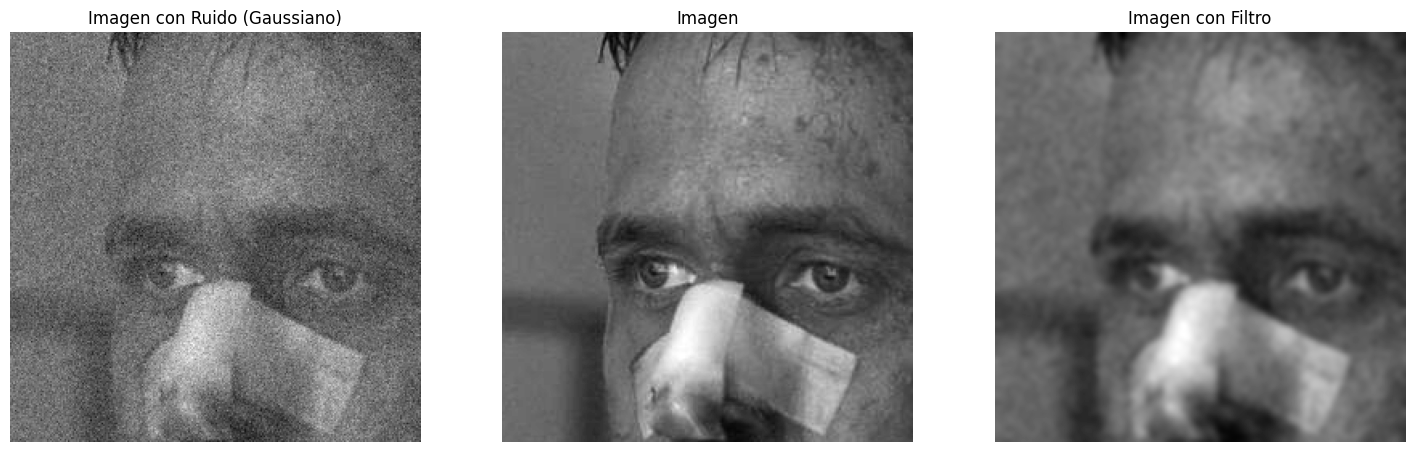

In [118]:
filtro= ndi.generic_filter(img_ruido_gaussiano, filtro_gaussiano, [10,10])

plt.figure(figsize=(18,10))
plt.subplot(1,3,1),plt.imshow(img_ruido_gaussiano, cmap="gray"),plt.title("Imagen con Ruido (Gaussiano)"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(gray, cmap="gray"),plt.title("Imagen"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(filtro, cmap="gray"),plt.title("Imagen con Filtro"),plt.axis('off')

plt.show()



#### 2)  Reduccion de ruido Uniforme  

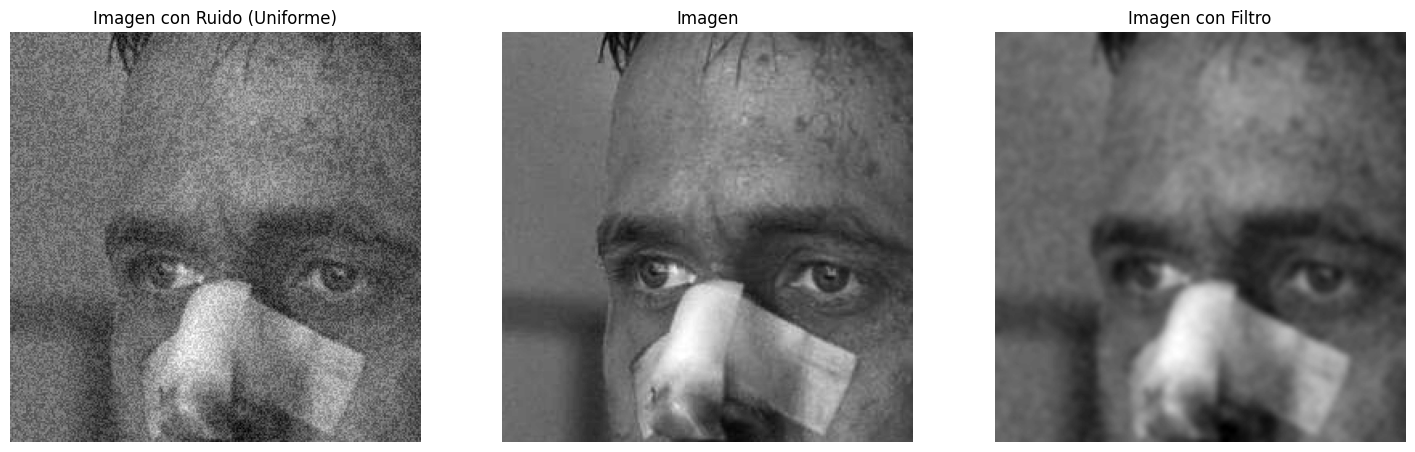

In [121]:
filtro= ndi.generic_filter(img_ruido_uniforme,filtro_gaussiano, [10,10])

plt.figure(figsize=(18,10))
plt.subplot(1,3,1),plt.imshow(img_ruido_uniforme, cmap="gray"),plt.title("Imagen con Ruido (Uniforme)"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(gray, cmap="gray"),plt.title("Imagen"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(filtro, cmap="gray"),plt.title("Imagen con Filtro"),plt.axis('off')

plt.show()

#### 3)  Reduccion de ruido Sal  - Filtros de orden estadísticos (min)

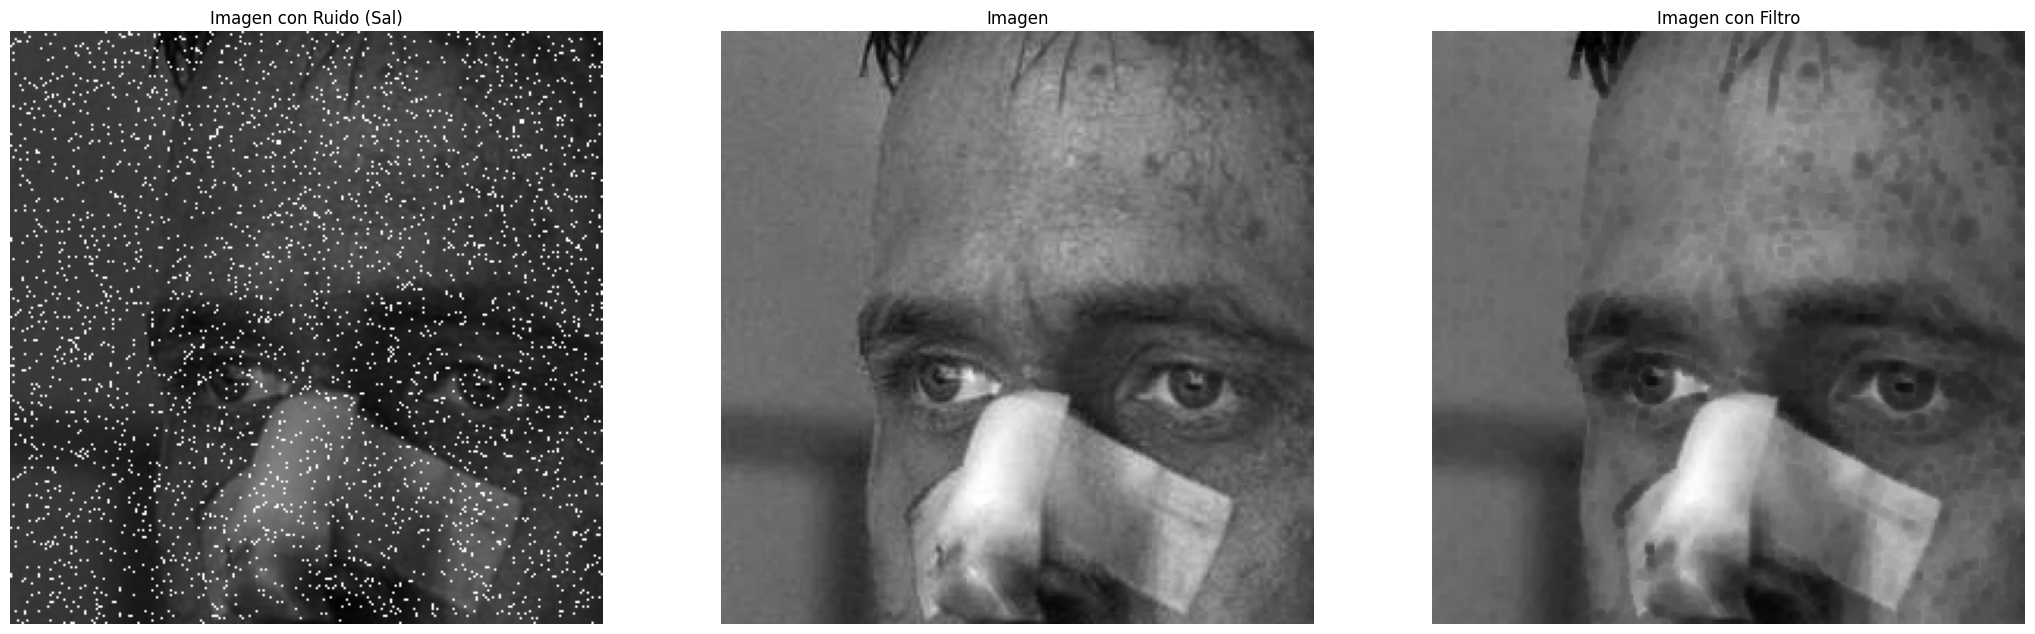

In [ ]:
filtro= ndi.generic_filter(img_ruido_sal,filtro_min, [3,3])

plt.figure(figsize=(26,10))
plt.subplot(1,3,1),plt.imshow(img_ruido_sal, cmap="gray"),plt.title("Imagen con Ruido (Sal)"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(gray, cmap="gray"),plt.title("Imagen"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(filtro, cmap="gray"),plt.title("Imagen con Filtro"),plt.axis('off')

plt.show()


#### 4)  Reduccion de ruido Pimienta - Filtros de orden estadísticos (max)

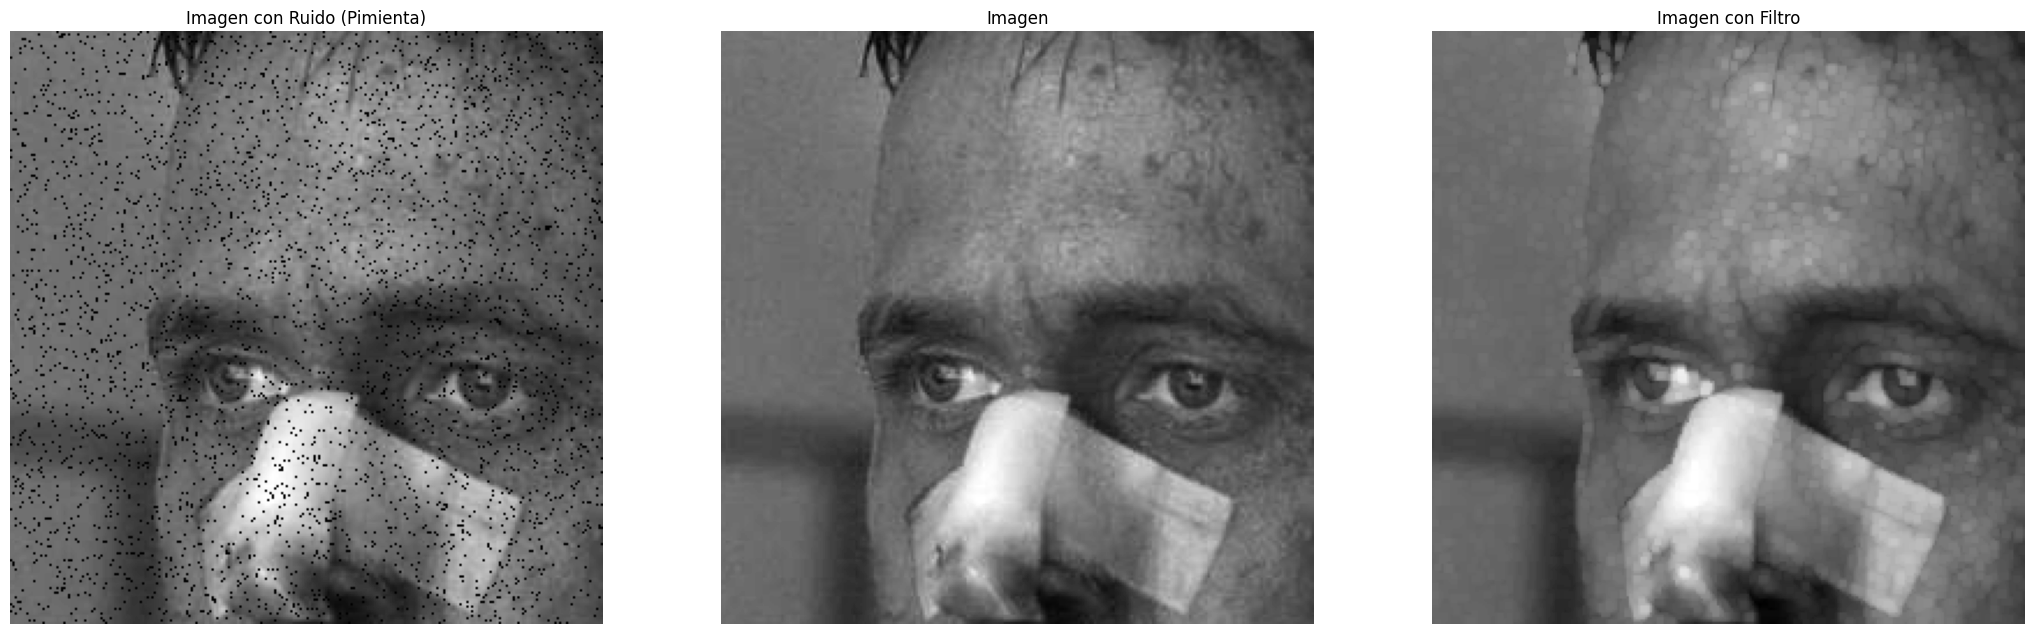

In [ ]:
filtro= ndi.generic_filter(img_ruido_pepper,filtro_max, [3,3])

plt.figure(figsize=(26,10))
plt.subplot(1,3,1),plt.imshow(img_ruido_pepper, cmap="gray"),plt.title("Imagen con Ruido (Pimienta)"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(gray, cmap="gray"),plt.title("Imagen"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(filtro, cmap="gray"),plt.title("Imagen con Filtro"),plt.axis('off')
plt.show()


## Parte 2
Restaure la imagen del siguiente código empleando el filtro de Wiener y el filtro Paramétrico. 
Determine el parámetro que mejor resultado genere. 

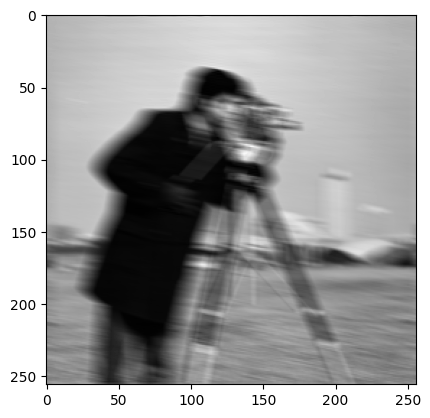

In [ ]:
import cv2 
import numpy as np  
import matplotlib.pyplot as plt 
 
img= cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE) 
gray = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX) 
F      = np.fft.fft2(gray) 
vector = np.linspace(-0.5, 0.5, gray.shape[0]) 
U,V    = np.meshgrid(vector, vector) 
 
a  = 5 
b  = 1 
UV = U*a+V*b 
G  = F*np.fft.fftshift(np.sinc(np.pi*UV)*np.exp(-1j*np.pi*UV)) 
g  = np.real(np.fft.ifft2(G)) 
 
plt.imshow(g, cmap='gray')  
plt.show()

###  Filtro de Wiener

In [ ]:
#Calculanos H (Conjugado complejo) dado que lo podemos calcular
#T=1
H=np.fft.fftshift(np.sinc(np.pi*UV)*np.exp(-1j*np.pi*UV))

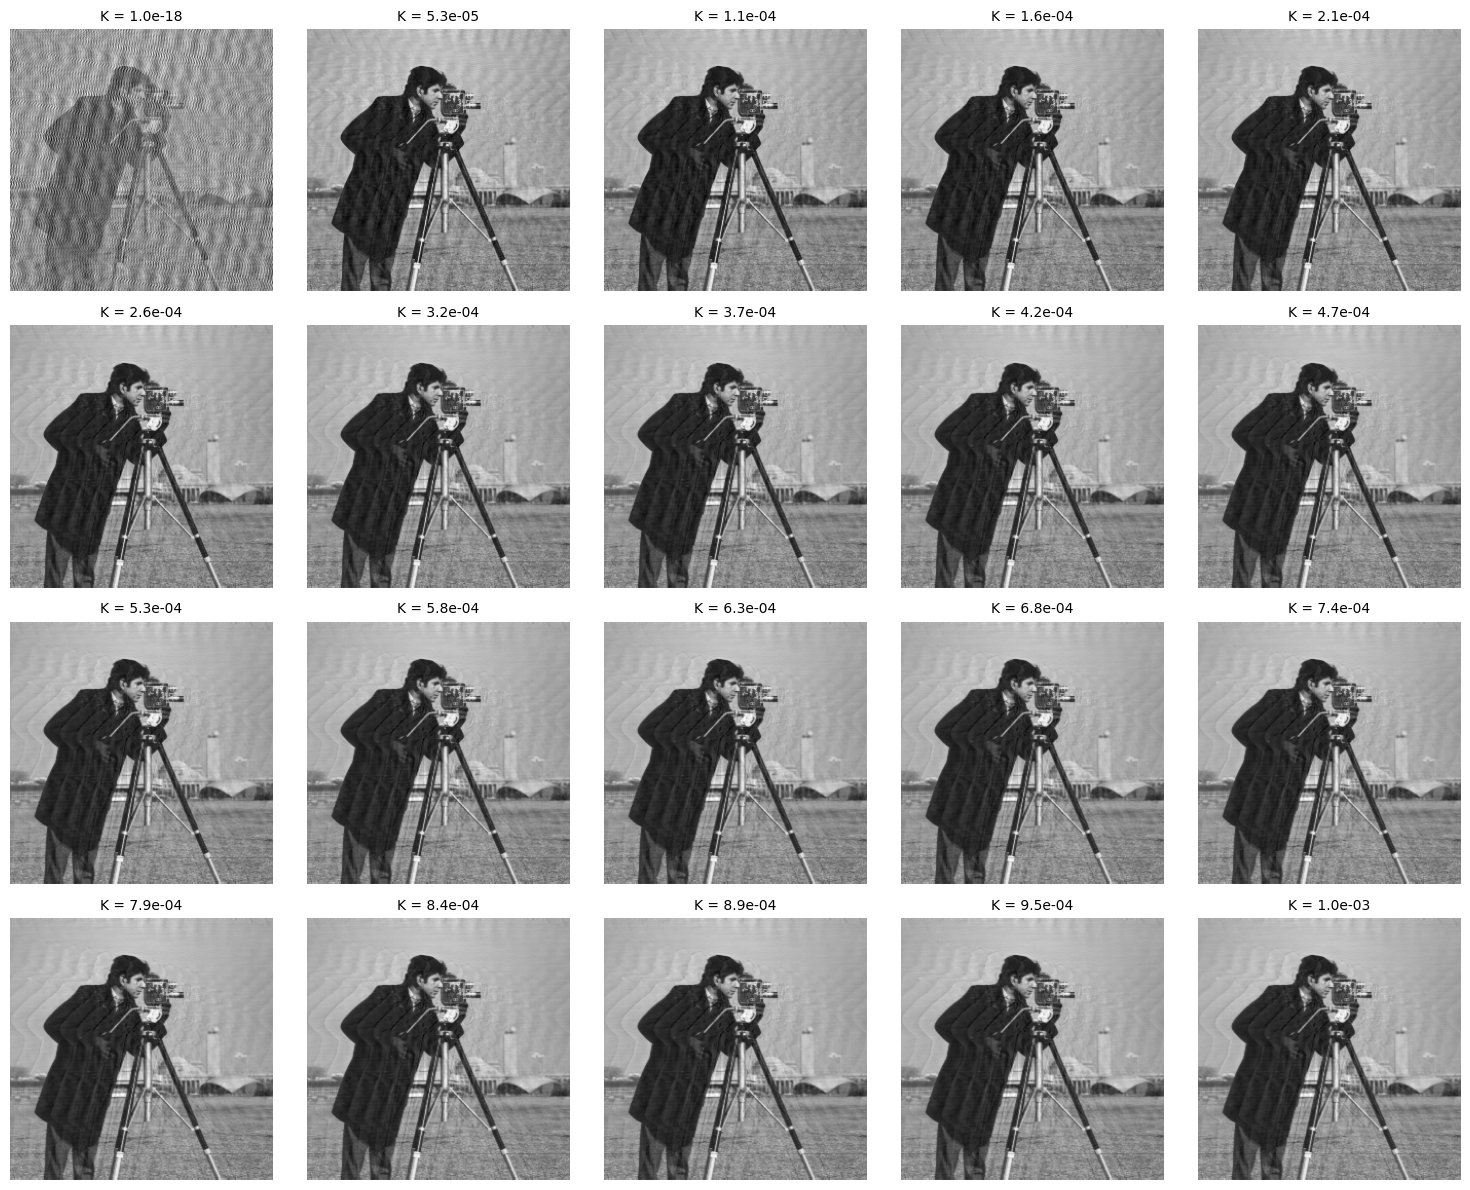

In [ ]:
noise_image=np.copy(g)

# Crear una figura y ejes de subtramas
plt.figure(figsize=(15, 12))

# Definir el rango de valores de K
vector = np.linspace(1e-18, 1e-3, 20)

# Procesar cada valor de K
for i, K in enumerate(vector, start=1):
    # Calcular W
    W = np.conj(H) / (np.abs(H) ** 2 + K)
    
    # Aplicar filtro y restaurar la imagen
    G = np.fft.fft2(noise_image)
    F = W * G
    iRestored = np.real(np.fft.ifft2(F))

    # Mostrar imagen en la subtrama correspondiente
    plt.subplot(4,5,i),plt.imshow(iRestored, cmap="gray"),plt.title("K = %.1e" % K, fontsize=10),plt.axis("off")

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

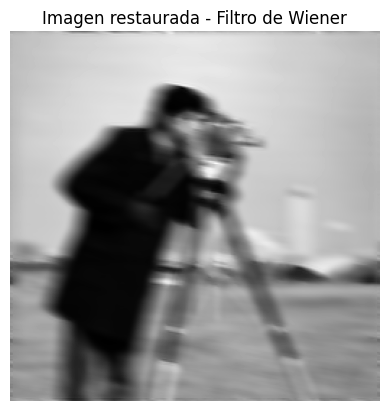

In [ ]:
from scipy.signal import wiener

# Aplicar filtro de Wiener
restaurada_wiener = wiener(g, (5, 5))

# Mostrar la imagen restaurada
plt.imshow(restaurada_wiener, cmap='gray')
plt.axis('off')
plt.title('Imagen restaurada - Filtro de Wiener')
plt.show()

### Filtro Paramétrico

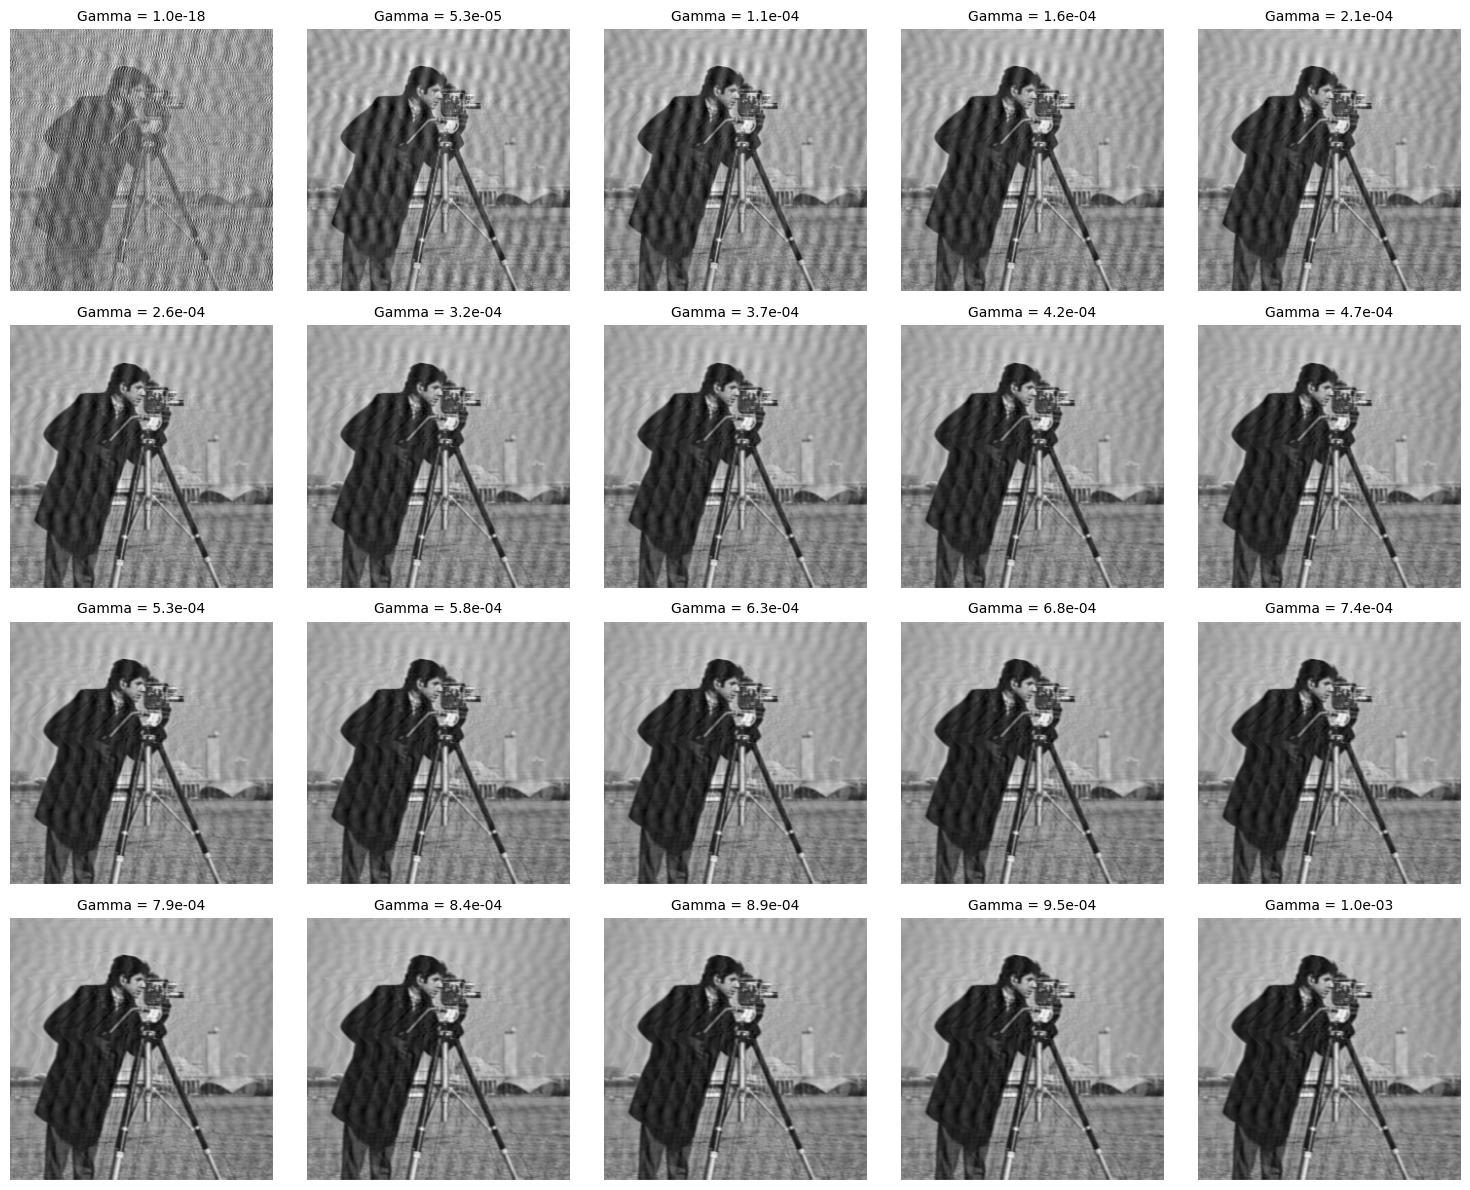

In [ ]:
noise_image=np.copy(g)
m,n=noise_image.shape
# Crear una figura y ejes de subtramas
plt.figure(figsize=(15, 12))

# Definir el rango de valores de K
vector = np.linspace(1e-18, 1e-3, 20)
p=np.array([[0 ,-1 ,0],[ -1, 4, -1],[0, -1, 0]])
Pp=np.fft.fft2(p,s=[m,n])
# Procesar cada valor de K
for i, gamma in enumerate(vector, start=1):
    G = np.fft.fft2(noise_image)
    F=(np.conj(H)*G)/(abs(H)**2+gamma*abs(Pp)**2)
    iRestored = np.real(np.fft.ifft2(F))

    # Mostrar imagen en la subtrama correspondiente
    plt.subplot(4,5,i),plt.imshow(iRestored, cmap="gray"),plt.title("Gamma = %.1e" % gamma, fontsize=10),plt.axis("off")

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()